### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

# Compile the main simulator code using cython 

In [1]:
!python setup.py build_ext --inplace

running build_ext
running build_ext


# Import all the relevant files 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importing scripts:

#Import relevant frames:
import cbgt as cbgt
import pipeline_creation as pl_creat

#Import plotting functions:
import plotting_functions as plt_func
import plotting_helper_functions as plt_help


import importlib

importlib.reload(plt_help)
importlib.reload(plt_func)

data_dir = "./Data/"
figure_dir = "./Figures/"

2023-07-25 13:10:39,888	INFO worker.py:1352 -- Connecting to existing Ray cluster at address: 127.0.0.1:6379...
2023-07-25 13:10:39,895	INFO worker.py:1529 -- Connected to Ray cluster. View the dashboard at http://127.0.0.1:8265 


# Choose the experiment and create the main pipeline

In [4]:
#Choose the experiment
experimentchoice = 'stopsignal'
number_of_choices = 2

#Call choose_pipeline with the pipeline object
pl_creat.choose_pipeline(experimentchoice)

#Create the main pipeline
pl = pl_creat.create_main_pipeline(runloop=True)

in choose pipeline
in reward pipeline


In [5]:
#Set a seed
seed = np.random.randint(0,99999999,1)[0]
print(seed)

75434668


# Running the pipeline

In [6]:
environment = {
    'experimentchoice': experimentchoice,
    'inter_trial_interval': None,
    'thalamic_threshold': 30.,
    'movement_time': ['constant', 300], #['constant', 300], #default sampled from N(250,1.5), ["constant",250], ["mean",250]
    'choice_timeout': 300, #default 1000
    
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([['left'], ["right"]], columns=['action']), #action channels related parameters (init_params.py)
    'number_of_choices':number_of_choices,
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df_set': pd.DataFrame([[0.5, 0.5]],columns=["left","right"]), #pd.DataFrame([[0.3,0.7]],columns=['left','right']), #initialized Q-values df (qvalues.py)  
    'n_trials': 3, #number of trials (generateepochs.py)
    'volatility': [1,"exact"], #frequency of changepoints (generateepochs.py)
    'conflict': (1.0, 0.0), #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 0.80, # amplitude of the cortical input over base line #0.85
    'sustainedfraction': 0.75,
    
    #Stop 1
    'stop_signal_present': False,
    'stop_signal_probability': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude': 0.35, # amplitude of the stop signal over base line
    'stop_signal_onset': 30., #in ms #antes 200
    'stop_signal_duration' : 150., 
    'stop_signal_channel': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signa
    'stop_signal_population':["STNE"],
    
    #Stop 2
    'stop_2_signal_present': False,
    'stop_2_signal_probability': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_2_signal_amplitude': 0.4, # amplitude of the stop signal over base line
    'stop_2_signal_onset': 60., #in ms #antes 200
    'stop_2_signal_duration' : 150.,
    'stop_2_signal_channel': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    'stop_2_signal_population':["GPeA"],
    
    
    'decision_channel' : 'all', #'all'(all channels)
                              # '0' : left channel considered 
                              # '1' : right channel considered
    
    'record_variables':["stop_input_1", "stop_input_2"],
    
    
    #Opto
    'opt_signal_present': False,
    'opt_signal_probability': 1., #[0,1,2,3,4], # probability of trials that will get the optogenetic signal / list of trial numbers
    'opt_signal_amplitude': .7, # ampitude of the stop signal over base line
    'opt_signal_onset': 30., # in ms
    'opt_signal_duration': 150.,
    'opt_signal_channel': "all", # "all" (all channels are given the stop signal) 
    'opt_signal_population':["D2STR"],
}

In [7]:
results = cbgt.ExecutionManager(cores=7).run([pl]*1,[environment]*1)  

(worker pid=10879) in choose pipeline
(worker pid=10879) in choose pipeline
(worker pid=10879) change points: [0 1 2 2]
(worker pid=10879) change points: [0 1 2 2]
(worker pid=10879) [2 1 0]
(worker pid=10879) [2 1 0]
(worker pid=10879) [1 0 2]
(worker pid=10879) [1 0 2]
(worker pid=10879) gateFRs [20.         30.44444444]
(worker pid=10879) thresholds_crossed [1]
(worker pid=10879) gateFRs [20.         30.44444444]
(worker pid=10879) thresholds_crossed [1]
(worker pid=10879) trial_num 0
(worker pid=10879)   action
(worker pid=10879) 0   left
(worker pid=10879) 1  right
(worker pid=10879) chosen_action: right
(worker pid=10879) trial_num 0
(worker pid=10879)   action
(worker pid=10879) 0   left
(worker pid=10879) 1  right
(worker pid=10879) chosen_action: right
(worker pid=10879) gateFRs [30.22222222 26.        ]
(worker pid=10879) thresholds_crossed [0]
(worker pid=10879) gateFRs [30.22222222 26.        ]
(worker pid=10879) thresholds_crossed [0]
(worker pid=10879) trial_num 1
(worker

In [8]:
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,right,0,169,169,470,470,left,0.0
1,left,1071,1172,101,402,1473,right,0.0
2,right,2074,2155,81,382,2456,left,0.0


In [ ]:
popfreqs = cbgt.collateVariable(results,'popfreqs')
plt_help.rename_columns(results[0])
popfreqs[0]

In [ ]:
popdata

In [ ]:
a = np.where(popdata[0]['name'] == 'LIP')[0][0]

#popdata[0].iloc[a[0]]['action']
a

In [ ]:
firing_rates, rt_dist = plt_help.extract_relevant_frames_stop(results,seed)

### RTs

In [ ]:
#Failed stops 

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(8,6))

repo = pd.DataFrame()
for i in datatables[0].index: 
    if datatables[0].decision.iloc[i] != 'none':
        temp = datatables[0].iloc[i]
        repo = repo.append(temp, ignore_index=True)

sns.histplot(data=repo, x='decisionduration', ax = ax, kde=True, color='green', alpha=0.3)

ax.set_ylabel('Count')
plt.title('RTs - Go trials')

plt.xlim(0, 301)
plt.savefig(figure_dir+'RTs_hist_Go.png')

### FRs

In [9]:
popfreqs = cbgt.collateVariable(results,'popfreqs')
plt_help.rename_columns(results[0])
popfreqs[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Time (ms)
0,77.111111,77.555556,24.311111,26.555556,55.833333,50.535714,8.245614,6.228070,2.222222,4.000000,4.000000,4.888889,0.000000,0.000000,4.666667,5.111111,7.777778,0.806452,0
1,76.888889,78.666667,24.200000,26.511111,55.744048,50.625000,8.245614,6.052632,2.222222,4.222222,4.000000,5.111111,0.000000,0.000000,4.666667,4.888889,7.777778,0.806452,1
2,77.111111,78.222222,23.977778,26.511111,55.476190,50.625000,8.245614,6.052632,2.222222,4.444444,3.777778,5.111111,0.000000,0.000000,4.666667,4.222222,7.555556,0.806452,2
3,76.444444,80.000000,24.022222,26.644444,55.119048,50.952381,8.070175,6.228070,2.000000,4.222222,4.000000,5.111111,0.000000,0.000000,4.666667,4.222222,7.555556,0.806452,3
4,76.666667,79.111111,24.066667,26.666667,54.910714,51.130952,8.157895,6.140351,2.000000,4.222222,4.000000,4.888889,0.000000,0.000000,4.666667,4.222222,7.777778,0.806452,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,77.777778,65.555556,25.755556,24.200000,52.380952,51.547619,11.929825,10.175439,4.666667,6.666667,5.777778,6.222222,4.493464,3.186275,8.222222,11.777778,8.888889,2.777778,3053
3054,77.111111,66.000000,25.577778,24.288889,52.708333,51.250000,11.929825,10.350877,4.666667,6.666667,5.777778,6.222222,4.411765,3.186275,8.444444,12.000000,8.888889,2.777778,3054
3055,76.444444,67.333333,25.333333,24.355556,52.916667,50.535714,11.403509,10.087719,4.666667,6.666667,5.777778,6.222222,4.411765,3.022876,8.444444,12.222222,8.888889,2.956989,3055
3056,76.000000,68.222222,25.200000,24.688889,53.303571,50.059524,11.403509,10.175439,4.444444,6.222222,6.000000,6.222222,4.411765,3.104575,8.666667,12.444444,8.888889,2.867384,3056


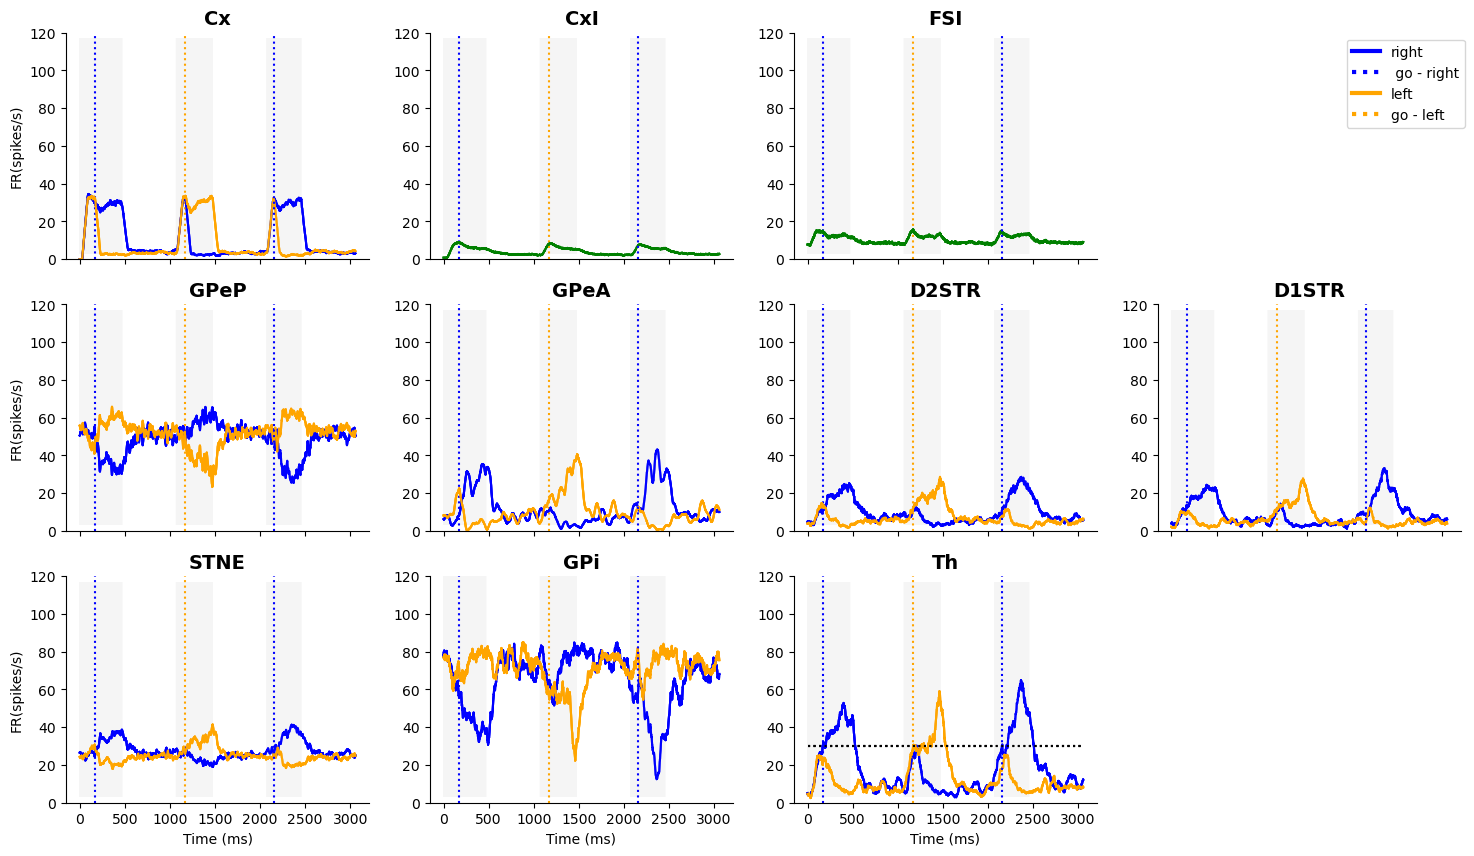

In [11]:
from matplotlib.lines import Line2D

f, (ax1, ax2, ax3) = plt.subplots(3, 4, figsize=(18, 10), sharex=True)
plt_help.rename_columns(results[0])

for i in range(0,len(datatables[0])):
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax1[0].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='Cx_right', c ='b', ax=ax1[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='Cx_left', c ='orange', ax=ax1[0])
    #ax1[0].vlines(datatables[0].stimulusstarttime[i],0,150,'silver', alpha = 0.7)
    if datatables[0].decision[i] == 'right':
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'orange', linestyle='dotted')
    elif datatables[0].decision[i] == 'stop': 
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'maroon', linestyle='dotted')
    else: 
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'m', linestyle='dotted')
    #ax1[0].legend(['D2STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')
    ax1[0].set_xlabel('Time (ms)')
    ax1[0].set_title('Cx', fontsize=14., weight='bold')
    
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax1[1].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='CxI_common', c ='green', ax=ax1[1])
    #ax1[1].vlines(datatables[0].stimulusstarttime[i],0,150,'silver', alpha = 0.7)
    if datatables[0].decision[i] == 'right':
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'orange', linestyle='dotted')
    elif datatables[0].decision[i] == 'stop': 
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'maroon', linestyle='dotted')
    else: 
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'m', linestyle='dotted')
    #ax1[1].legend(['D1STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')
    ax1[1].set_xlabel('Time (ms)')
    ax1[1].set_title('CxI', fontsize=14., weight='bold')
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax1[2].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='FSI_common', c ='green', ax=ax1[2])
    #ax2[0].vlines(datatables[0].stimulusstarttime[i],0, 130,'silver', alpha=0.7) 
    if datatables[0].decision[i] == 'right':
        ax1[2].vlines(datatables[0].decisiontime[i],0,130,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax1[2].vlines(datatables[0].decisiontime[i],0,130,'orange', linestyle='dotted')
    elif datatables[0].decision[i] == 'stop': 
        ax1[2].vlines(datatables[0].decisiontime[i],0,130,'maroon', linestyle='dotted')
    else: 
        ax1[2].vlines(datatables[0].decisiontime[i],0,130,'m', linestyle='dotted')
    #ax2[0].legend(['GPeP'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    #if results[0]['stop_signal_present'] == True:
        #ax2[0].hlines(y=72, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    #if results[0]['stop_signal_present_2'] == True:
        #ax2[0].hlines(y=80, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    ax1[2].set_xlabel('Time (ms)')
    ax1[2].set_title('FSI', fontsize=14., weight='bold')
    #if results[0]['opt_signal_present'] == True:
        #ax2[0].hlines(y=90, xmin=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0]+results[0]['opt_signal_duration'], colors='darkmagenta', linewidth = 6)
       

    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax3[2].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='Th_right', c ='b', ax=ax3[2])
    results[0]['popfreqs'].plot(x='Time (ms)', y='Th_left', c ='orange', ax=ax3[2])
    #ax2[1].vlines(datatables[0].stimulusstarttime[i],0, 130,'silver', alpha=0.7) 
    if datatables[0].decision[i] == 'right':
        ax3[2].vlines(datatables[0].decisiontime[i],0,130,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax3[2].vlines(datatables[0].decisiontime[i],0,130, 'orange', linestyle='dotted')
    elif datatables[0].decision[i] == 'stop': 
        ax3[2].vlines(datatables[0].decisiontime[i],0,130,'maroon', linestyle='dotted')
    else: 
        ax3[2].vlines(datatables[0].decisiontime[i],0,130,'m', linestyle='dotted')
    #ax2[1].legend(['GPeA'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    #if results[0]['stop_signal_present'] == True:
        #ax1[1].hlines(y=36, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    #if results[0]['stop_signal_present_2'] == True:
       #ax1[1].hlines(y=35, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    ax3[2].hlines(30, 0, datatables[0].rewardtime[2]+600, linestyles='dotted', color='black')
    ax3[2].set_xlabel('Time (ms)')
    ax3[2].set_title('Th', fontsize=14., weight='bold')
    if results[0]['stop_signal_present'] == True:
        ax3[2].hlines(70, datatables[0].stimulusstarttime[i]+results[0]['stop_signal_onset'], datatables[0].stimulusstarttime[i]+results[0]['stop_signal_onset']+ results[0]['stop_signal_duration'], color='r', linewidth=4.)
    if results[0]['stop_2_signal_present'] == True:
        ax3[2].hlines(72, datatables[0].stimulusstarttime[i]+results[0]['stop_2_signal_onset'], datatables[0].stimulusstarttime[i]+results[0]['stop_2_signal_onset']+ results[0]['stop_2_signal_duration'], color='darkcyan', linewidth=4.)
        
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax2[2].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='D2STR_right', c ='b', ax=ax2[2])
    results[0]['popfreqs'].plot(x='Time (ms)', y='D2STR_left', c ='orange', ax=ax2[2])
    #ax1[0].vlines(datatables[0].stimulusstarttime[i],0,150,'silver', alpha = 0.7)
    if datatables[0].decision[i] == 'right':
        ax2[2].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax2[2].vlines(datatables[0].decisiontime[i],0,150,'orange', linestyle='dotted')
    elif datatables[0].decision[i] == 'stop': 
        ax2[2].vlines(datatables[0].decisiontime[i],0,150,'maroon', linestyle='dotted')
    else: 
        ax2[2].vlines(datatables[0].decisiontime[i],0,150,'m', linestyle='dotted')
    #ax1[0].legend(['D2STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')
    #if results[0]['stop_2_signal_present'] == True:
        #ax1[0].hlines(y=80, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_2_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_2_onset_df'].iloc[0][0]+results[0]['stop_2_signal_duration'], colors='y', linewidth = 6)
    ax2[2].set_xlabel('Time (ms)')
    ax2[2].set_title('D2STR', fontsize=14., weight='bold')
    
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax2[3].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='D1STR_right', c ='b', ax=ax2[3])
    results[0]['popfreqs'].plot(x='Time (ms)', y='D1STR_left', c ='orange', ax=ax2[3])
    #ax1[1].vlines(datatables[0].stimulusstarttime[i],0,150,'silver', alpha = 0.7)
    if datatables[0].decision[i] == 'right':
        ax2[3].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax2[3].vlines(datatables[0].decisiontime[i],0,150,'orange', linestyle='dotted')
    elif datatables[0].decision[i] == 'stop': 
        ax2[3].vlines(datatables[0].decisiontime[i],0,150,'maroon', linestyle='dotted')
    else: 
        ax2[1].vlines(datatables[0].decisiontime[i],0,150,'m', linestyle='dotted')
    #ax1[1].legend(['D1STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')
    ax2[3].set_xlabel('Time (ms)')
    ax2[3].set_title('D1STR', fontsize=14., weight='bold')

    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax2[0].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_right', c ='b', ax=ax2[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='orange', ax=ax2[0])
    #ax2[0].vlines(datatables[0].stimulusstarttime[i],0, 130,'silver', alpha=0.7) 
    if datatables[0].decision[i] == 'right':
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'orange', linestyle='dotted')
    elif datatables[0].decision[i] == 'stop': 
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'maroon', linestyle='dotted')
    else: 
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'m', linestyle='dotted')
    #ax2[0].legend(['GPeP'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    #if results[0]['stop_signal_present'] == True:
        #ax2[0].hlines(y=72, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    #if results[0]['stop_signal_present_2'] == True:
        #ax2[0].hlines(y=80, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    ax2[0].set_xlabel('Time (ms)')
    ax2[0].set_title('GPeP', fontsize=14., weight='bold')
    #if results[0]['opt_signal_present'] == True:
        #ax2[0].hlines(y=90, xmin=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0]+results[0]['opt_signal_duration'], colors='darkmagenta', linewidth = 6)
       

    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax2[1].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeA_right', c ='b', ax=ax2[1])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeA_left', c ='orange', ax=ax2[1])
    #ax2[1].vlines(datatables[0].stimulusstarttime[i],0, 130,'silver', alpha=0.7) 
    if datatables[0].decision[i] == 'right':
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'orange', linestyle='dotted')
    elif datatables[0].decision[i] == 'stop': 
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'maroon', linestyle='dotted')
    else: 
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'m', linestyle='dotted')
    #ax2[1].legend(['GPeA'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    #if results[0]['stop_signal_present'] == True:
        #ax1[1].hlines(y=36, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    ax2[1].set_xlabel('Time (ms)')
    ax2[1].set_title('GPeA', fontsize=14., weight='bold')
    if results[0]['stop_2_signal_present'] == True:
        ax2[1].hlines(y=80, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_2_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_2_onset_df'].iloc[0][0]+results[0]['stop_2_signal_duration'], colors='darkcyan', linewidth = 6)
    
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_left', c ='y', ax=ax3[0])
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax3[0].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_right', c ='b', ax=ax3[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_left', c ='orange', ax=ax3[0])
    #ax3[0].vlines(datatables[0].stimulusstarttime[i], 0,150,'silver', alpha=0.7)
    if datatables[0].decision[i] == 'right':
        ax3[0].vlines(datatables[0].decisiontime[i], 0, 150, 'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'orange', linestyle='dotted')
    elif datatables[0].decision[i] == 'stop': 
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'maroon', linestyle='dotted')
    else: 
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'm', linestyle='dotted')
    #ax3[0].legend(['STNE'], loc = 'best') #(['STNE_left', 'STNE_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax3[0].hlines(y=80, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    ax3[0].set_xlabel('Time (ms)')
    ax3[0].set_title('STNE', fontsize=14., weight='bold')
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax3[1].vlines(j, 3, 197, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPi_right', c ='b', ax=ax3[1], label='GPi')
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPi_left', c ='orange', ax=ax3[1], label='GPi')
    #ax3[1].vlines(datatables[0].stimulusstarttime[i], 0,150,'silver', alpha=0.7)
    if datatables[0].decision[i] == 'right':
        ax3[1].vlines(datatables[0].decisiontime[i], 0, 190, 'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax3[1].vlines(datatables[0].decisiontime[i],0, 190, 'orange', linestyle='dotted')
    elif datatables[0].decision[i] == 'stop': 
        ax3[1].vlines(datatables[0].decisiontime[i],0, 190, 'maroon', linestyle='dotted')
    else: 
        ax3[1].vlines(datatables[0].decisiontime[i],0, 190, 'm', linestyle='dotted')
    ax3[1].set_xlabel('Time (ms)')
    ax3[1].set_title('GPi', fontsize=14., weight='bold')
    
ax1[0].set_ylim(0, 120)
ax1[1].set_ylim(0, 120)
ax1[2].set_ylim(0, 120)
ax2[0].set_ylim(0, 120)
ax2[1].set_ylim(0, 120)
ax2[2].set_ylim(0, 120)
ax2[3].set_ylim(0, 120)
ax3[0].set_ylim(0, 120)
ax3[1].set_ylim(0, 120)
ax3[2].set_ylim(0, 120)

ax1[0].get_legend().remove()
ax1[1].get_legend().remove()
ax1[2].get_legend().remove()
ax2[0].get_legend().remove()
ax2[1].get_legend().remove()
ax2[2].get_legend().remove()
ax2[3].get_legend().remove()
ax3[0].get_legend().remove()
ax3[1].get_legend().remove()
ax3[2].get_legend().remove()

ax1[3].set_axis_off()
ax3[3].set_axis_off()

ax1[0].set_ylabel('FR(spikes/s)')
ax2[0].set_ylabel('FR(spikes/s)')
ax3[0].set_ylabel('FR(spikes/s)')

ax1[0].spines[['right', 'top']].set_visible(False)
ax1[1].spines[['right', 'top']].set_visible(False)
ax1[2].spines[['right', 'top']].set_visible(False)
ax2[0].spines[['right', 'top']].set_visible(False)
ax2[1].spines[['right', 'top']].set_visible(False)
ax2[2].spines[['right', 'top']].set_visible(False)
ax2[3].spines[['right', 'top']].set_visible(False)
ax3[0].spines[['right', 'top']].set_visible(False)
ax3[1].spines[['right', 'top']].set_visible(False)
ax3[2].spines[['right', 'top']].set_visible(False)

#blue_patch = mpatches.Patch(color='blue', linestyle='dotted', linewidth=0.5, label='go')
#red_patch = mpatches.Patch(color='red', label='stop')
#fig.legend(handles=[blue_patch, red_patch])

ax2[3].set_xlabel('Time (ms)')

legend_elements = [Line2D([0], [0], color='blue', lw=3, label='right'),
                   Line2D([0], [0], color='blue', linestyle='dotted', lw=3, label=' go - right'), 
                   Line2D([0], [0], color='orange', lw=3, label='left'),
                   Line2D([0], [0], color='orange', lw=3, linestyle='dotted', label='go - left')]
                   #Line2D([0], [0], color='maroon', lw=3, linestyle='dotted', label='stop')]
ax1[1].legend(handles=legend_elements, bbox_to_anchor =(3, 1.), loc='upper left')
#plt.xlim(0, 1200)

plt.savefig('./Figures/FRs_trialwise.png', dpi=400)

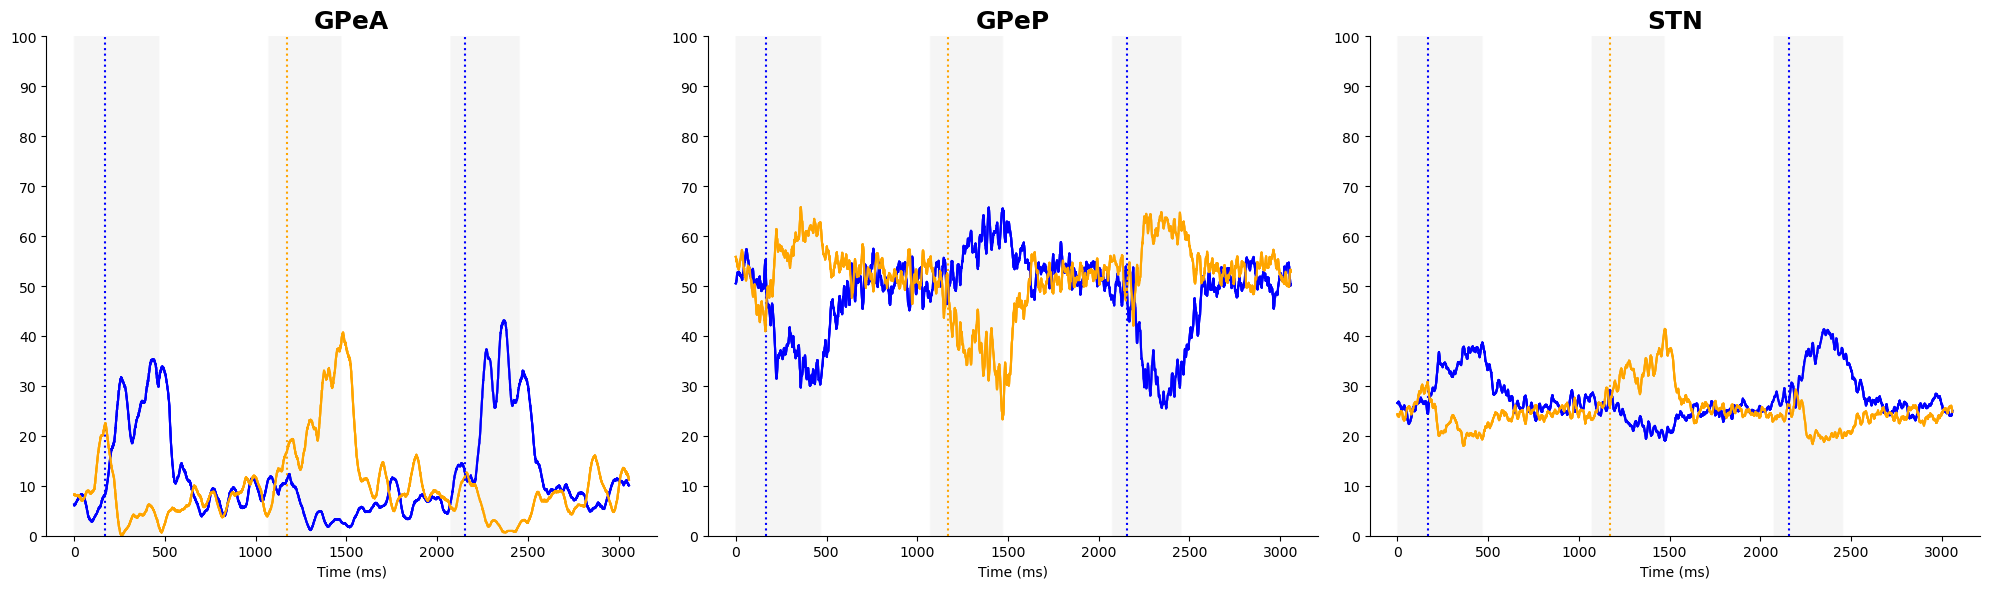

In [12]:
from matplotlib.lines import Line2D

f, (ax1) = plt.subplots(1, 3, figsize=(20, 6), sharex=True, tight_layout=True)
plt_help.rename_columns(results[0])

for i in range(0,len(datatables[0])):
    
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax1[0].vlines(j, 0, 117, 'whitesmoke', alpha=0.04)
    #if results[0]['stop_signal_present'] == True:
        #ax1[0].hlines(68, datatables[0].stimulusstarttime[i]+results[0]['stop_signal_onset'], datatables[0].stimulusstarttime[i]+results[0]['stop_signal_onset']+ results[0]['stop_signal_duration'], color='r', linewidth=4.)
    if results[0]['stop_2_signal_present'] == True:
        ax1[0].hlines(90, datatables[0].stimulusstarttime[i]+results[0]['stop_2_signal_onset'], datatables[0].stimulusstarttime[i]+results[0]['stop_2_signal_onset']+ results[0]['stop_2_signal_duration'], color='darkcyan', linewidth=4.)
  
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeA_right', c ='b', ax=ax1[0])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeA_left', c ='orange', ax=ax1[0])
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPi_left', c ='darkorange', ax=ax1)
    #ax1[0].vlines(datatables[0].stimulusstarttime[i],0,150,'silver', alpha = 0.7)
    if datatables[0].decision[i] == 'right':
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax1[0].vlines(datatables[0].decisiontime[i],0,150, 'orange', linestyle='dotted')
    elif datatables[0].decision[i] == 'stop': 
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'maroon', linestyle='dotted')
    else: 
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'m')
    #ax1[0].legend(['D2STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')
    ax1[0].set_xlabel('Time (ms)')
    ax1[0].set_title('GPeA', fontsize=18., weight='bold')
    #ax1.hlines(30, 0, 3000, linestyles='dotted', color='black')
    
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax1[1].vlines(j, 0, 117, 'whitesmoke', alpha=0.04)
    if results[0]['stop_signal_present'] == True:
        ax1[1].hlines(90, datatables[0].stimulusstarttime[i]+results[0]['stop_signal_onset'], datatables[0].stimulusstarttime[i]+results[0]['stop_signal_onset']+ results[0]['stop_signal_duration'], color='r', linewidth=4.)
    if results[0]['stop_2_signal_present'] == True:
        ax1[1].hlines(92, datatables[0].stimulusstarttime[i]+results[0]['stop_2_signal_onset'], datatables[0].stimulusstarttime[i]+results[0]['stop_2_signal_onset']+ results[0]['stop_2_signal_duration'], color='darkcyan', linewidth=4.)
          
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_right', c ='b', ax=ax1[1])
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='orange', ax=ax1[1])
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPi_left', c ='darkorange', ax=ax1)
    #ax1[0].vlines(datatables[0].stimulusstarttime[i],0,150,'silver', alpha = 0.7)
    if datatables[0].decision[i] == 'right':
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax1[1].vlines(datatables[0].decisiontime[i],0,150, 'orange', linestyle='dotted')
    elif datatables[0].decision[i] == 'stop': 
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'maroon', linestyle='dotted')
    else: 
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'m')
    #ax1[0].legend(['D2STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')
    ax1[1].set_xlabel('Time (ms)')
    ax1[1].set_title('GPeP', fontsize=18., weight='bold')
    
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax1[2].vlines(j, 0, 117, 'whitesmoke', alpha=0.04)
    if results[0]['stop_signal_present'] == True:
        ax1[2].hlines(70, datatables[0].stimulusstarttime[i]+results[0]['stop_signal_onset'], datatables[0].stimulusstarttime[i]+results[0]['stop_signal_onset']+ results[0]['stop_signal_duration'], color='r', linewidth=4.)
    #if results[0]['stop_2_signal_present'] == True:
        #ax1[2].hlines(70, datatables[0].stimulusstarttime[i]+results[0]['stop_2_signal_onset'], datatables[0].stimulusstarttime[i]+results[0]['stop_2_signal_onset']+ results[0]['stop_2_signal_duration'], color='yellowgreen', linewidth=4.)
         
    results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_right', c ='b', ax=ax1[2])
    results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_left', c ='orange', ax=ax1[2])
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPi_left', c ='darkorange', ax=ax1)
    #ax1[0].vlines(datatables[0].stimulusstarttime[i],0,150,'silver', alpha = 0.7)
    if datatables[0].decision[i] == 'right':
        ax1[2].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax1[2].vlines(datatables[0].decisiontime[i],0,150, 'orange', linestyle='dotted')
    elif datatables[0].decision[i] == 'stop': 
        ax1[2].vlines(datatables[0].decisiontime[i],0,150,'maroon', linestyle='dotted')
    else: 
        ax1[2].vlines(datatables[0].decisiontime[i],0,150,'m')
    #ax1[0].legend(['D2STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')
    ax1[2].set_xlabel('Time (ms)')
    ax1[2].set_title('STN', fontsize=18., weight='bold')
    
    
    
ax1[0].set_ylim(0, 100)
ax1[0].set_yticks(np.arange(0, 110, 10))
ax1[0].spines[['right', 'top']].set_visible(False)

ax1[1].set_ylim(0, 100)
ax1[1].set_yticks(np.arange(0, 110, 10))
ax1[1].spines[['right', 'top']].set_visible(False)

ax1[2].set_ylim(0, 100)
ax1[2].set_yticks(np.arange(0, 110, 10))
ax1[2].spines[['right', 'top']].set_visible(False)

ax1[0].get_legend().remove()
ax1[1].get_legend().remove()
ax1[2].get_legend().remove()

#plt.ylim(0,20)
#blue_patch = mpatches.Patch(color='blue', linestyle='dotted', linewidth=0.5, label='go')
#red_patch = mpatches.Patch(color='red', label='stop')
#fig.legend(handles=[blue_patch, red_patch])

legend_elements = [Line2D([0], [0], color='blue', lw=3, label='right'),
                   Line2D([0], [0], color='blue', linestyle='dotted', lw=3, label=' go - right'), 
                   Line2D([0], [0], color='orange', lw=3, label='left'),
                   Line2D([0], [0], color='orange', lw=3, linestyle='dotted', label='go - left')]
                   #Line2D([0], [0], color='maroon', lw=3, linestyle='dotted', label='stop')]
#ax1[1].legend(handles=legend_elements, bbox_to_anchor =(2.6, 1.), loc='upper left')

plt.savefig('./Figures/FRs_trialwise_GPe_STN.png', dpi=400)